Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, we do an exercise of building a model to predict whether a customer will make a claim on their insurance during the policy period. We will use simple Logistic Regression, identifying the single feature that results in the best performing model, as measured by accuracy.

We have customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.

## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-15</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [2]:
# Import required libraries and suppress messages
suppressMessages(library(dplyr))
suppressMessages(library(readr))
suppressMessages(library(glue))
suppressMessages(library(yardstick))
library(readr)
library(dplyr)
library(glue)
library(yardstick)



Investigate and clean the data, so that there are no missing values

In [7]:
df = read_csv('car_insurance.csv')
head(df)

Rows: 10000 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): driving_experience, education, income, vehicle_year, vehicle_type
dbl (13): id, age, gender, credit_score, vehicle_ownership, married, childre...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
569520,3,0,0-9y,high school,upper class,0.6290273,1,after 2015,0,1,10238,12000,sedan,0,0,0,0
750365,0,1,0-9y,none,poverty,0.3577571,0,before 2015,0,0,10238,16000,sedan,0,0,0,1
199901,0,0,0-9y,high school,working class,0.4931458,1,before 2015,0,0,10238,11000,sedan,0,0,0,0
478866,0,1,0-9y,university,working class,0.2060129,1,before 2015,0,1,32765,11000,sedan,0,0,0,0
731664,1,1,10-19y,none,working class,0.3883659,1,before 2015,0,0,32765,12000,sedan,2,0,1,1
877557,2,0,20-29y,high school,upper class,0.6191274,1,after 2015,0,1,10238,13000,sedan,3,0,3,0


Exploring the data to find out about missing values

In [16]:
sample_var <- sample(1:nrow(df),500)
df_sample <- df[sample_var,]
head(df_sample, n = 10)

id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
158167,2,0,20-29y,university,upper class,0.7031338,1,after 2015,1,1,32765,11000,sedan,1,0,0,0
528598,1,0,10-19y,university,upper class,0.5872959,1,before 2015,1,1,32765,13000,sedan,0,0,0,0
261755,2,1,10-19y,university,upper class,0.5283948,1,before 2015,0,1,32765,12000,sedan,5,0,0,1
622084,1,0,10-19y,university,poverty,0.3659826,1,before 2015,0,1,10238,14000,sedan,0,0,1,0
151587,1,1,10-19y,university,working class,0.5332127,0,before 2015,0,0,32765,13000,sedan,0,0,0,1
872505,2,1,20-29y,high school,middle class,0.3944150,0,before 2015,1,1,10238,6000,sedan,6,1,3,0
584002,2,0,20-29y,university,upper class,0.7046155,0,after 2015,0,0,10238,14000,sedan,3,2,1,0
108077,2,0,20-29y,high school,working class,0.5712859,0,before 2015,0,0,10238,13000,sedan,1,0,0,0
598794,3,1,20-29y,university,upper class,0.5652583,1,before 2015,0,1,10238,11000,sedan,0,1,6,0


In [31]:
summary(df)

       id              age           gender      driving_experience
 Min.   :   101   Min.   :0.00   Min.   :0.000   Length:10000      
 1st Qu.:249638   1st Qu.:1.00   1st Qu.:0.000   Class :character  
 Median :501777   Median :1.00   Median :0.000   Mode  :character  
 Mean   :500522   Mean   :1.49   Mean   :0.499                     
 3rd Qu.:753974   3rd Qu.:2.00   3rd Qu.:1.000                     
 Max.   :999976   Max.   :3.00   Max.   :1.000                     
                                                                   
  education            income           credit_score    vehicle_ownership
 Length:10000       Length:10000       Min.   :0.0534   Min.   :0.000    
 Class :character   Class :character   1st Qu.:0.4172   1st Qu.:0.000    
 Mode  :character   Mode  :character   Median :0.5250   Median :1.000    
                                       Mean   :0.5158   Mean   :0.697    
                                       3rd Qu.:0.6183   3rd Qu.:1.000    
            

In [26]:
missing <- df %>% is.na() %>% colSums()
print(missing)

                 id                 age              gender  driving_experience 
                  0                   0                   0                   0 
          education              income        credit_score   vehicle_ownership 
                  0                   0                 982                   0 
       vehicle_year             married            children         postal_code 
                  0                   0                   0                   0 
     annual_mileage        vehicle_type speeding_violations                duis 
                957                   0                   0                   0 
     past_accidents             outcome 
                  0                   0 


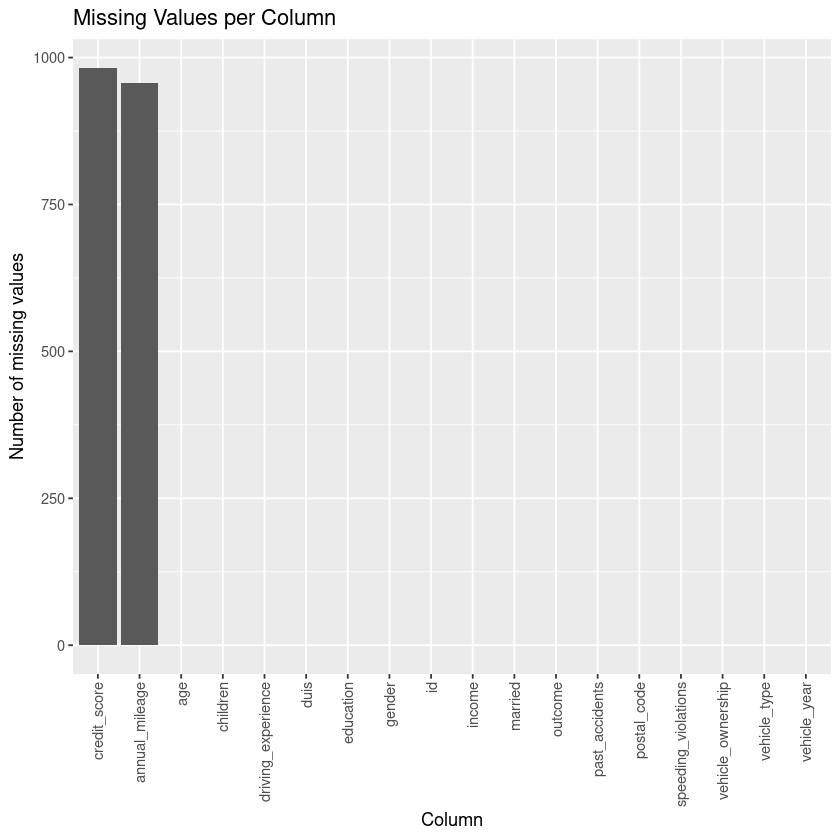

In [30]:
library(ggplot2)
df_missing <- data.frame(column=names(missing), count=missing)
ggplot(df_missing, aes(x=reorder(column,-count), y=count)) + 
  geom_bar(stat="identity") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
  xlab("Column") + 
  ylab("Number of missing values") + 
  ggtitle("Missing Values per Column") 

In [33]:
install.packages("visdat") # install the package
library(visdat) # load the package

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/visdat_0.6.0.tar.gz' ...
	OK [downloaded 1.1 Mb in 0.4 secs]
Installing visdat [0.6.0] ...
	OK [installed binary]
Moving visdat [0.6.0] into the cache ...
	OK [moved to cache in 0.35 milliseconds]


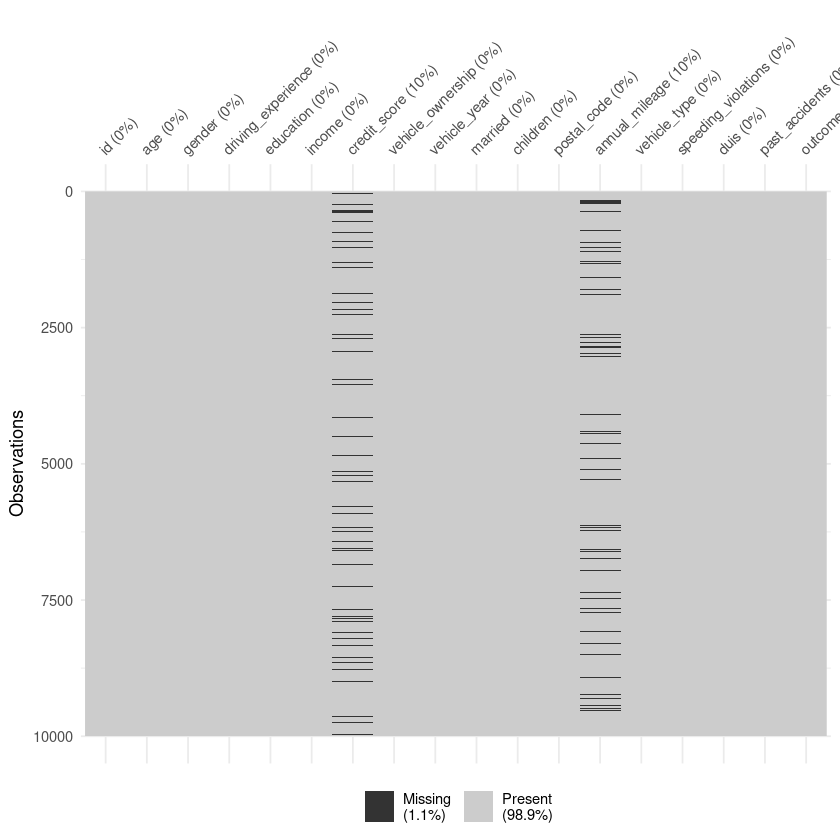

In [34]:
vis_miss(df) #missing values in black and present values in grey

Investigating if missing values completely at random or missing values at random.

In [39]:
df %>%
select(-id)%>%
mutate(credit_score = is.na(credit_score)) %>%
group_by(credit_score) %>%
summarise(across(.cols = where(is.numeric), median, na.ram = TRUE))

credit_score,age,gender,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,1,1,1,1,1,10238,NA,0,0,0,0
TRUE,1,0,1,0,1,10238,NA,1,0,0,0


In [40]:
df %>%
select(-id)%>%
mutate(annual_mileage = is.na(annual_mileage)) %>%
group_by(annual_mileage) %>%
summarise(across(.cols = where(is.numeric), median, na.ram = TRUE))

annual_mileage,age,gender,credit_score,vehicle_ownership,married,children,postal_code,speeding_violations,duis,past_accidents,outcome
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,1,0,NA,1,0,1,10238,0,0,0,0
TRUE,1,1,NA,1,1,1,10238,0,0,0,0


In [41]:
df %>%
select(-id)%>%
mutate(annual_mileage = is.na(annual_mileage), credit_score = is.na(credit_score)) %>%
group_by(annual_mileage, credit_score) %>%
summarise(across(.cols = where(is.numeric), median, na.ram = TRUE))

`summarise()` has grouped output by 'annual_mileage'. You can override using
the `.groups` argument.
New names:
• `` -> `...1`


annual_mileage,credit_score,age,gender,vehicle_ownership,married,children,postal_code,speeding_violations,duis,past_accidents,outcome
<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,FALSE,1,0,1,1,1,10238,0.0,0,0,0
FALSE,TRUE,1,0,1,0,1,10238,1.0,0,0,0
TRUE,FALSE,1,1,1,0,1,10238,0.0,0,0,0
TRUE,TRUE,1,0,1,1,1,10238,0.5,0,0,0


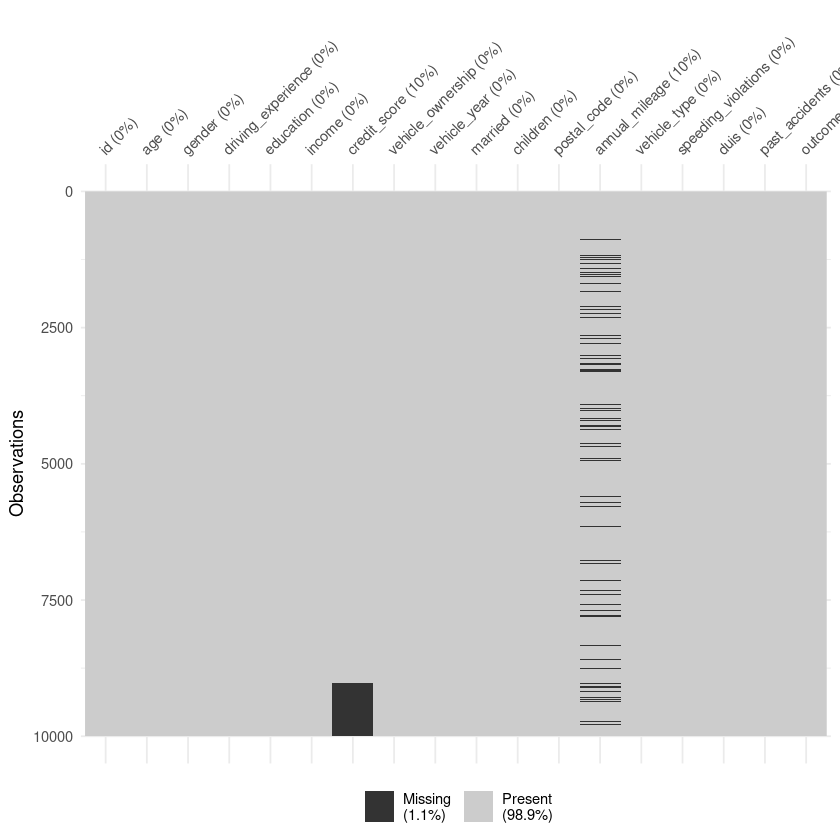

In [46]:
df %>% 
arrange(credit_score) %>%  
vis_miss()


The missing values are completely at random, therefore we can do missing data imputation or we can also perform row wise deletion here because only 1.1% data is missing and we have 10000 variable, so it won't impact our results significantly.

In [117]:
df_clean <- df %>% 
			mutate(credit_score = ifelse(is.na(credit_score), mean(credit_score, na.rm =TRUE), credit_score), annual_mileage = ifelse(is.na(annual_mileage), mean(annual_mileage, na.rm =TRUE), annual_mileage))

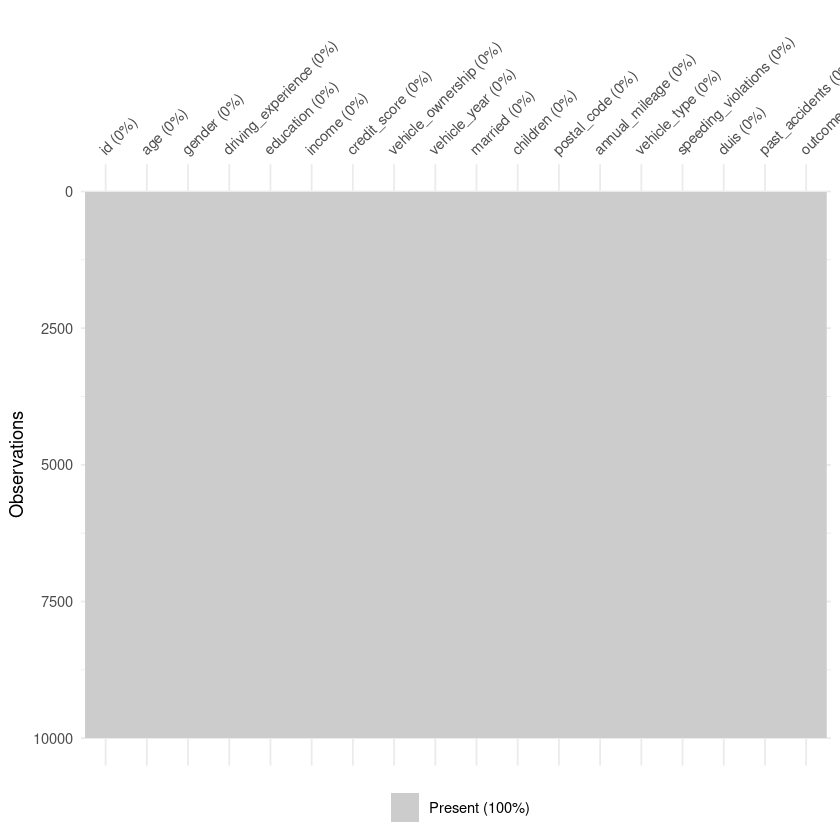

In [118]:
vis_miss(df_clean)

Now comes the logistic regression modelling part

In [119]:
features <- names(subset(df_clean, select = -c(id, outcome)))

In [120]:
print(features)

 [1] "age"                 "gender"              "driving_experience" 
 [4] "education"           "income"              "credit_score"       
 [7] "vehicle_ownership"   "vehicle_year"        "married"            
[10] "children"            "postal_code"         "annual_mileage"     
[13] "vehicle_type"        "speeding_violations" "duis"               
[16] "past_accidents"     


In [121]:
accuracies = c()

In [122]:
for (col in features) { 
  models <- glm(as.formula(glue('outcome ~ {col}')), data = df_clean, family = 'binomial')
  predictions <- round(fitted(models))
  outcomes <- table(predictions, df_clean$outcome)
    if (nrow(outcomes) == 1) {
    # Model only predicted one label, so accuracy is calculated differently
    accuracies[col] <- outcomes[1] / sum(outcomes)
  } else {
    # Calculate accuracy as sum of true negatives and true positives divided by sum of all outcomes
    accuracies[col] <- (outcomes[1, 1] + outcomes[2, 2]) / sum(outcomes)
  }

}

In [123]:
print(accuracies)

                age              gender  driving_experience           education 
             0.7747              0.6867              0.7771              0.6867 
             income        credit_score   vehicle_ownership        vehicle_year 
             0.7425              0.7054              0.7351              0.6867 
            married            children         postal_code      annual_mileage 
             0.6867              0.6867              0.6867              0.6904 
       vehicle_type speeding_violations                duis      past_accidents 
             0.6867              0.6867              0.6867              0.6867 


In [124]:
best_feature <- features[which.max(accuracies)]
best_accuracy <-max(accuracies)

In [125]:
View(best_accuracy)

[1] 0.7771

In [127]:
best_feature_df <- data.frame(best_feature, best_accuracy)


In [128]:
best_feature_df

best_feature,best_accuracy
<chr>,<dbl>
driving_experience,0.7771
